# Notebook d'administration : création d'utilisateurs à partir d'un csv, ajout à des groupes et transfert de contenu

#### Import des bibliothèques:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")
import pandas as pd
from datetime import datetime
time = datetime.now().strftime('%Y_%M_%d_%H_%M_%S')

/opt/conda/lib/python3.9/site-packages/arcgis/gis/__init__.py:597: UserWarning: You are logged on as plouis_esrifrance with an administrator role, proceed with caution.
  warnings.warn(


#### Doc

In [2]:
#gis.groups.search()

In [3]:
#gis.users.create?

In [4]:
#gis.users.license_types

In [5]:
#role_mgr = gis.users.roles
#for role in role_mgr.all():
     #print(f"{role.name}  {role.role_id}")

### Recherche des groupes partagés

In [6]:
shared_groups = gis.groups.search('title: Demo_SIG2022+Partage', max_groups=15)
shared_groups

[<Group title:"[Demo_SIG2022]Partage_Cartes" owner:plouis_esrifrance>,
 <Group title:"[Demo_SIG2022]Partage_Donnees" owner:plouis_esrifrance>]

In [7]:
new_user_groups = []
for i in range (len(shared_groups)):
    new_user_groups.append(shared_groups[i].groupid)
new_user_groups

['da2af26959e64ca39ba5af62d5e072f1', '4bcda561605c4e06a4224cee06d2bb1f']

### Lecture du csv et conversion en pandas dataframe

In [8]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/JapaLenos/SIG2022_Demos/main/Developper_avec_ArcGIS/API_Python/New_users.csv',sep=";")
df
#print(df.to_string()) 

,Prenom,Nom,Role,Description,RemplacementPrenom,RemplacementNom
0,Sylvie,Prost,advanced,Sylvie utilise ArcGIS Pro au quotidien pour de...,NaN,NaN
1,Sarah,Comte,storyteller,Sarah cree des storymaps pour la mise en avant...,Marie,Senva
2,Jean,Creason,creator,Jean cree et edite diverses applications sur A...,NaN,NaN


### Création des utilisateurs à partir du dataframe, ajout dans les groupes commun et modification des tags, de la bio et de la photo de profil

<User username:Sylvie_Prost_2022_50_08_14_50_56>
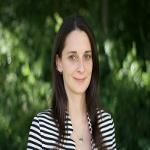

<User username:Sarah_Comte_2022_50_08_14_50_56>
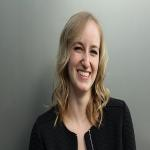

<User username:Jean_Creason_2022_50_08_14_50_56>
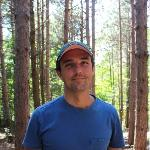

In [9]:
for i in df.index:
    new_user = gis.users.create(username = '{0}_{1}_{2}'.format(df["Prenom"][i],df["Nom"][i],time),
                              password = 'passw*rd',
                              firstname = df["Prenom"][i],
                              lastname = df["Nom"][i],
                              user_type = "{0}UT".format(df["Role"][i]),
                              email = "demo@esrifrance.fr",
                              groups = new_user_groups)
    
    user=gis.users.get('{0}_{1}_{2}'.format(df["Prenom"][i],df["Nom"][i],time))
    pp = '/arcgis/home/pp_{0}_{1}.jpg'.format(df["Prenom"][i],df["Nom"][i])
    user.update(description=df["Description"][i],tags="nouveau",thumbnail=pp)
    
    display(user)

### Ajout à un groupe spécifique pour le rôle storyteller

In [10]:
story_groups = gis.groups.search('title: Demo_SIG2022+StoryMap', max_groups=15)

In [11]:
for i in df.index:
    if df["Role"][i] == "storyteller":
        story_groups[0].add_users(['{0}_{1}_{2}'.format(df["Prenom"][i],df["Nom"][i],time)])

### Transfert de contenu et suppression d'un ancien compte dans le cas d'un remplacement

In [12]:
for i in df.index:
    if pd.isna(df['RemplacementPrenom'][i]) == False :
        old_user = gis.users.get("{0}_{1}".format(df['RemplacementPrenom'][i],df['RemplacementNom'][i]))
        old_user.delete(reassign_to='{0}_{1}_{2}'.format(df["Prenom"][i],df["Nom"][i],time))

In [13]:
for i in df.index:
    if pd.isna(df['RemplacementPrenom'][i]) == False :
        old_user = gis.users.get("{0}_{1}_1".format(df['RemplacementPrenom'][i],df['RemplacementNom'][i]))
        old_user